### Importing all required packages

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
from nltk.translate.bleu_score import sentence_bleu
import networkx as nx
import matplotlib.pyplot as plt
import re

In [2]:
import pickle

In [3]:
import PyPDF2 as pdf

### Data Collection & Cleaning

In [4]:
import os
 
# Get the list of all files and directories
path = "C://Users//Lance Machado//Desktop//DSA Projects//NLP Project"
dir_list = os.listdir(path)

# Get Relevent document from directory
doc_list = []
for x in dir_list:
    if re.match(r'.*pdf$',x):
        doc_list.append(x)

In [9]:
doc_list

['IRJET-V4I5105.pdf',
 'IRJET-V5I4978.pdf',
 'IRJET-V6I330.pdf',
 'IRJET-V6I5768.pdf',
 'IRJET-V7I1238.pdf',
 'IRJET-V7I5186.pdf',
 'IRJET-V7I7379.pdf',
 'IRJET-V8I12173.pdf',
 'IRJET-V8I3540.pdf']

### Creating Data-set 

In [11]:
# fetching & segregation of text data.
summary = []
document = []

for name in doc_list:
    file = open(name,mode='rb')
    doc = pdf.PdfFileReader(file)
    nos = doc.getNumPages()
    pg = ''
    contents = ''

    for x in range(nos):
        page = doc.getPage(x)
        pg = page.extractText()
        contents = contents + pg
    
    text = re.sub('\n','',contents)

    # creating search patterns to segregate the data.
    start_of_summary = re.compile(r'abstr[act]',re.IGNORECASE)
    end_of_summary = re.compile(r'introd[uction]',re.IGNORECASE)
    ref_doc = re.compile(r'references',re.IGNORECASE)

    abs_match = start_of_summary.search(text)
    intro_match = end_of_summary.search(text)
    ref_match = ref_doc.search(text)

    # Getting the range to segregate the text according to summary and complete document.
    abstract_start = abs_match.span()
    intro_start = intro_match.span()
    ref_start = ref_match.span()

    # Abstract for evaluation
    abstract = text[abstract_start[0]:intro_start[0]]

    # Main body of the document
    body = text[intro_start[0]:ref_start[0]]

    # Removing repetative patterns from the document
    body = re.sub(r'\s{2,}','',body)
    body = re.sub(r'International Research Journal of Engineering and Technology',
           '',body,re.IGNORECASE)
    body = re.sub(r'Page\s\d{1,4}','',body,re.IGNORECASE)
    
    summary.append(abstract)
    document.append(body)

In [12]:
def text_cleaner(body):
    body = re.sub(r'\s{2,}',' ',body)
    body = re.sub(r'International Research Journal of Engineering and Technology',
           '',body,re.IGNORECASE)
    body = re.sub(r'.IRJET.','',body)
    body = re.sub(r'Page\s\d{1,4}','',body,re.IGNORECASE)
    body = re.sub(r'INTRODUCTION','',body)
    body = re.sub(r'www.irjet.net','',body)
    body = re.sub(r'(\w{3}-\d{4})','',body)         #Apr-2008
    body = re.sub(r'(\w{3}\s\d{4}:\d{4})','',body)  #ISO 9001:2008
    body = re.sub(r'Certified Journal','',body)     #Certified Journal
    body = re.sub(r'(\w{3}-\d{1,3}:)','',body)      #Fig-2:
    body = re.sub(r'(Impact Factor value)','',body) #Impact Factor value
    body = re.sub(r'\d{4}','',body)                 #year
    body = re.sub(r'\d{1}','',body)
    body = re.sub(r'e-ISSN\:\s\d{4}-\d{4}','',body) #e-ISSN: 2395-0056
    body = re.sub(r'p-ISSN\:\s\d{4}-\d{4}','',body) #p-ISSN: 2395-0056
    body = re.sub(r'Volume\:','',body) 
    body = re.sub(r'Issue\:','',body) 
    body = re.sub(r'\|','',body)
    body = re.sub(r'\s{2,}',' ',body)
    
    return body

In [13]:
# fetching & segregation of text data.
summary = []
document = []

for name in doc_list:
    file = open(name,mode='rb')
    doc = pdf.PdfFileReader(file)
    nos = doc.getNumPages()
    pg = ''
    contents = ''

    for x in range(nos):
        page = doc.getPage(x)
        pg = page.extractText()
        contents = contents + pg
    
    text = re.sub('\n','',contents)

    # creating search patterns to segregate the data.
    start_of_summary = re.compile(r'abstr[act]',re.IGNORECASE)
    end_of_summary = re.compile(r'introd[uction]',re.IGNORECASE)
    ref_doc = re.compile(r'references',re.IGNORECASE)

    abs_match = start_of_summary.search(text)
    intro_match = end_of_summary.search(text)
    ref_match = ref_doc.search(text)

    # Getting the range to segregate the text according to summary and complete document.
    abstract_start = abs_match.span()
    intro_start = intro_match.span()
    ref_start = ref_match.span()

    # Abstract for evaluation
    abstract = text[abstract_start[0]:intro_start[0]]
    abstract = re.sub(r'Abstract|ABSTRACT|ABSTRCT','',abstract,re.I)
    
    # Main body of the document
    body = text[intro_start[0]:ref_start[0]]

    # Removing repetative patterns from the document
    body = text_cleaner(body)
    
    summary.append(abstract)
    document.append(body)

In [14]:
df = pd.DataFrame()
df["document"] = document
df["summary"] = summary

In [15]:
df

,document,summary
0,Robotics plays very vital role in various fie...,- The home robotics is an evolution of the ex...
1,New advances are landing in this world. Numer...,- This paper centers around utilization of el...
2,Robotics is a technology which is used to dev...,Robots are rapidly developing from factory t...
3,Electromagnetic brakes (also called electro-m...,- This project aims to create an electromagne...
4,Electromagnetic brakes have been used as supp...,: The traditional way to change a tire is to ...
5,.. Brake A vehicle brake is used to slow down...,This principle of braking road vehicles in t...
6,Magnetic brakes (also called eddy current bra...,: MOST OF BRAKING SYSTEM RUN ON THE PRINCIPLE ...
7,Brakes are a widely used tool to slow down th...,- Electromagnetic brakes may be new and flexi...
8,Brakes are the device which are wont to retar...,- An electromagnetic brake may be a new and r...


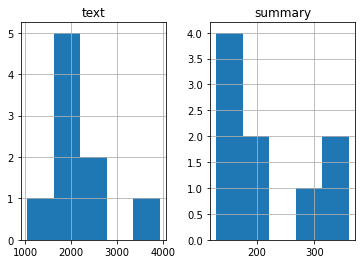

In [16]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['document']:
      text_word_count.append(len(i.split()))

for i in df['summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 5)
plt.show()

### Extractive Text Summerization

In [17]:
def read_doc_text(doc_text):
    article = doc_text.split(". ")
    sentences = []

    for sentence in article:
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    sentences.pop() 
    return sentences

In [23]:
def create_similarity_matrix(sentences, stop_words):
    
    # Creating an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for index1 in range(len(sentences)):      
        for index2 in range(len(sentences)):
            if index1 == index2: #ignore if both are same sentences                
                continue 
                
            similarity_matrix[index1][index2] = sentence_similarity(sentences[index1],
                                                                    sentences[index2],
                                                                    stop_words)
                       
    return similarity_matrix

In [24]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
    
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        
        vector1[all_words.index(w)] += 1
        
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
                    
    return (1 - cosine_distance(vector1, vector2))

In [25]:
def text_summary(doc_text, top_n=6):
    stop_words = stopwords.words('english')
    summarize_text = []

    # Reading text and spliting it to setences.
    sentences =  read_doc_text(doc_text)

    # Generate Similary Martix across sentences
    sentence_similarity_martix = create_similarity_matrix(sentences, stop_words)
    
    # Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)

    # score is dictionary with key = node and value is its rank
    scores = nx.pagerank(sentence_similarity_graph)

    # Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    
    for i in range(top_n):
      summarize_text.append(" ".join(ranked_sentence[i][1]))
    print(". ".join(summarize_text))

### Evaluating the results

In [29]:
txt_summary = str(text_summary(df.iat[4,0]))

The main principle of electromagnetic brake to induced kinetic energy into heat energy and this type brake mainly working principle is one rotating metal disc in between the two magnets to apply the brake to induced electric current in circuit to induced magnetic field in armature to attract the magnet to the rotating metal disc and stopped the rotation in several time while applied brake. Solenoid is the coil having more no of turns and it is used to produce high strength magnetic field which is used in this Electromagnetic Braking.  Electromagnetic brakes have been used as supplementary retardation equipment in addition to the regular friction brakes on heavy vehicles. RESULTS By using the electromagnetic brake as supplementary retardation equipment, the friction brakes can be used less frequently, and therefore practically never reach high temperatures. Bearing Electromagnet An electromagnet is a type of magnet in which the magnetic field is produced by an electric current. In addit

In [32]:
df.iat[4,1]

': The traditional way to change a  tire is to loosen the lug nuts one by one with the help of wheel spanner. However, it is exhausting and time consuming in car service centers and workshops. Hence, in this project to we are incorporating sun and planetary gear mechanism to remove all 4 lug nuts of the care wheel simultaneously with the help of primary power source. An adjustable Multi-nut remover or tighter for car tire is designed to change a  wheel by driving a planetary gear mechanism with a single motor in which all 4 lug nuts can be simultaneously be loosened or tightened, the pitch circle diameter for different model and variants of car is adjusted by Four-jaw self centering chuck mechanism. The machine can be used for tightening or loosening of lug nuts of 3 different models of car by using a keypad remote. The machine is expected to be 40% more efficient than the traditional method of loosening or tightening of the lug nuts.  1. '

In [31]:
ref = [df.iat[4,1].split()]
test = txt_summary.split()
print('BLEU score for test-> {}'.format(sentence_bleu(ref, test)))

BLEU score for test-> 0


### Abstractive Summerizer Simpletransformers

In [33]:
from simpletransformers.seq2seq import Seq2SeqModel,Seq2SeqArgs

In [24]:
model_args = Seq2SeqArgs()
model_args.num_train_epochs = 4
model_args.no_save = True
model_args.max_length = 100
model_args.evaluate_generated_text = True
model_args.evaluate_during_training = True
model_args.evaluate_during_training_verbose = True
model_args.overwrite_output_dir = True

# Initialize model
model = Seq2SeqModel(
    encoder_decoder_type="bart",
    encoder_decoder_name="facebook/bart-large",
    args=model_args,
    use_cuda=False,
)

In [25]:
df1 = df.rename({'document':'input_text','summary':'target_text'},axis=1)

In [26]:
train_df = df1[0:7]
test_df = df1[7:]

In [27]:
train_df

,input_text,target_text
0,Robotics plays very vital role in various fie...,- The home robotics is an evolution of the ex...
1,New advances are landing in this world. Numer...,- This paper centers around utilization of el...
2,Robotics is a technology which is used to dev...,Robots are rapidly developing from factory t...
3,Electromagnetic brakes (also called electro-m...,- This project aims to create an electromagne...
4,Electromagnetic brakes have been used as supp...,: The traditional way to change a tire is to ...
5,.. Brake A vehicle brake is used to slow down...,This principle of braking road vehicles in t...
6,Magnetic brakes (also called eddy current bra...,: MOST OF BRAKING SYSTEM RUN ON THE PRINCIPLE ...


In [28]:
test_df

,input_text,target_text
7,Brakes are a widely used tool to slow down th...,- Electromagnetic brakes may be new and flexi...
8,Brakes are the device which are wont to retar...,- An electromagnetic brake may be a new and r...


In [29]:
# Train the model
model.train_model(train_data=train_df, eval_data=test_df)

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

(4,
 {'global_step': [1, 2, 3, 4],
  'eval_loss': [4.82901668548584,
   3.6393508911132812,
   3.536156415939331,
   3.4960734844207764],
  'train_loss': [7.652157783508301,
   7.6750569343566895,
   4.813510894775391,
   4.485307216644287]})

In [30]:
# Evaluate the model
results = model.eval_model(test_df)

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
results

{'eval_loss': 3.4960734844207764}

In [32]:
# prediction
print(model.predict([df.iat[2,0]]))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

['Introduction to the field of robotics. Robotics is a technology which is used to develop machines that can be a replacement for humans and replicate human actions[]. Robots are physical agents that perform tasks by manipulating the physical world. For this, they are equipped with effectors such as legs, wheels, joints and grippers. Effectors have a single purpose to assert physical forces on the environment. Effector are used to control the movement of the robot, and to control its speed and direction.']


In [34]:
pickle.dump(model, open('model_summarizer.pkl','wb'))

In [34]:
model = pickle.load(open('model_summarizer.pkl','rb'))

In [36]:
txt_AB_summary = model.predict([df.iat[4,0]])

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
txt_AB_summary = txt_AB_summary[0]

In [42]:
ref = [df.iat[4,1].split()]
test = txt_AB_summary.split()
print('BLEU score for test-> {}'.format(sentence_bleu(ref, test)))

BLEU score for test-> 2.405238241414534e-155


The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction() [bleu_score.py:516]
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction() [bleu_score.py:516]


### Abstractive Summerizer (transformers' pretrained pipeline )

In [37]:
from transformers import pipeline

In [38]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [98]:
ARTICLE = df.iat[4,0][:5000]

In [75]:
summarizer(hgg, max_length=130, min_length=30, do_sample=False)

[{'summary_text': ' The Boys is an American superhero television series based on the comic book of the same name . The series stars Karl Urban, Jack Quaid, Laz Alonso, Tomer Capone, and Karen Fukuhara as the vigilantes . The first season premiered on July 26, 2019 . It was renewed for a third season in July 2020, which was released in June 2022 .'}]

In [97]:
df.iat[4,0][:5000]

"INTRODUCTIONElectromagnetic brakes have been used as supplementary retardation equipment in addition to the regular friction brakes on heavy vehicles. The principle of braking in road vehicles involves the conversion of kinetic energy into thermal energy (heat). When stepping on the brakes, the driver commands a stopping force several times as powerful as the force that puts the car in motion and dissipates the associated kinetic energy as heat. Brakes must be able to arrest the speed of a vehicle in a short period of time regardless how fast the speed is. As a result, the brakes are required to have the ability to generating high torque and absorbing energy at extremely high rates for short periods of time. Brakes may be applied for a prolonged period of time in some applications such as a heavy vehicle descending a long gradient at high speed. Brakes must have the mechanism to keep the heat absorption capability for prolonged periods of time. In the electromagnetic brake, the coil o